In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading DataSet

In [176]:
data=pd.read_csv("ufc-fighters-statistics.csv")
data.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Unnamed: 18,match_results
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,10/5/1981,0.00,0,0.00,0,7.32,100,0,21.9,NaN,win
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77,0.00,0,0.00,0,100,21.6,NaN,loss
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0,5.58,60,0.00,0,0,20.9,NaN,win
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33,1.40,75,0.00,0,100,20.9,NaN,win
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,9/29/1994,2.05,60,2.73,42,10.23,100,0,20.4,NaN,win


In [177]:
data.isna().sum()


name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
Unnamed: 18                                   

In [178]:
copy_data=data

# Data Inspection

In [179]:
copy_data.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Unnamed: 18,match_results
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,10/5/1981,0.00,0,0.00,0,7.32,100,0,21.9,NaN,win
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77,0.00,0,0.00,0,100,21.6,NaN,loss
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0,5.58,60,0.00,0,0,20.9,NaN,win
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33,1.40,75,0.00,0,100,20.9,NaN,win
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,9/29/1994,2.05,60,2.73,42,10.23,100,0,20.4,NaN,win


In [180]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [181]:
float_features=copy_data.select_dtypes(include=['float64']).columns
print("Number of Integer Features: ", float_features.shape[0])
print(float_features.to_list())

Number of Integer Features:  8
['height_cm', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_strikes_absorbed_per_minute', 'average_takedowns_landed_per_15_minutes', 'average_submissions_attempted_per_15_minutes', 'Unnamed: 18']


In [182]:
int_features=copy_data.select_dtypes(include=['int64']).columns
print("Number of Integer Features: ", int_features.shape[0])
print(int_features.to_list())

Number of Integer Features:  7
['wins', 'losses', 'draws', 'significant_striking_accuracy', 'significant_strike_defence', 'takedown_accuracy', 'takedown_defense']


In [183]:
cat_features=copy_data.select_dtypes(include=['object']).columns
print("Number of Integer Features: ", cat_features.shape[0])
print(cat_features.to_list())

Number of Integer Features:  5
['name', 'nickname', 'stance', 'date_of_birth', 'match_results']


In [184]:
copy_data["nickname"]

0              NaN
1       The Animal
2              NaN
3              NaN
4           All In
           ...    
4106           NaN
4107           NaN
4108           NaN
4109         Money
4110          PITA
Name: nickname, Length: 4111, dtype: object

# Clening the Data by Dropping features, Outlier handling and Checking Missing Values and Handling Them

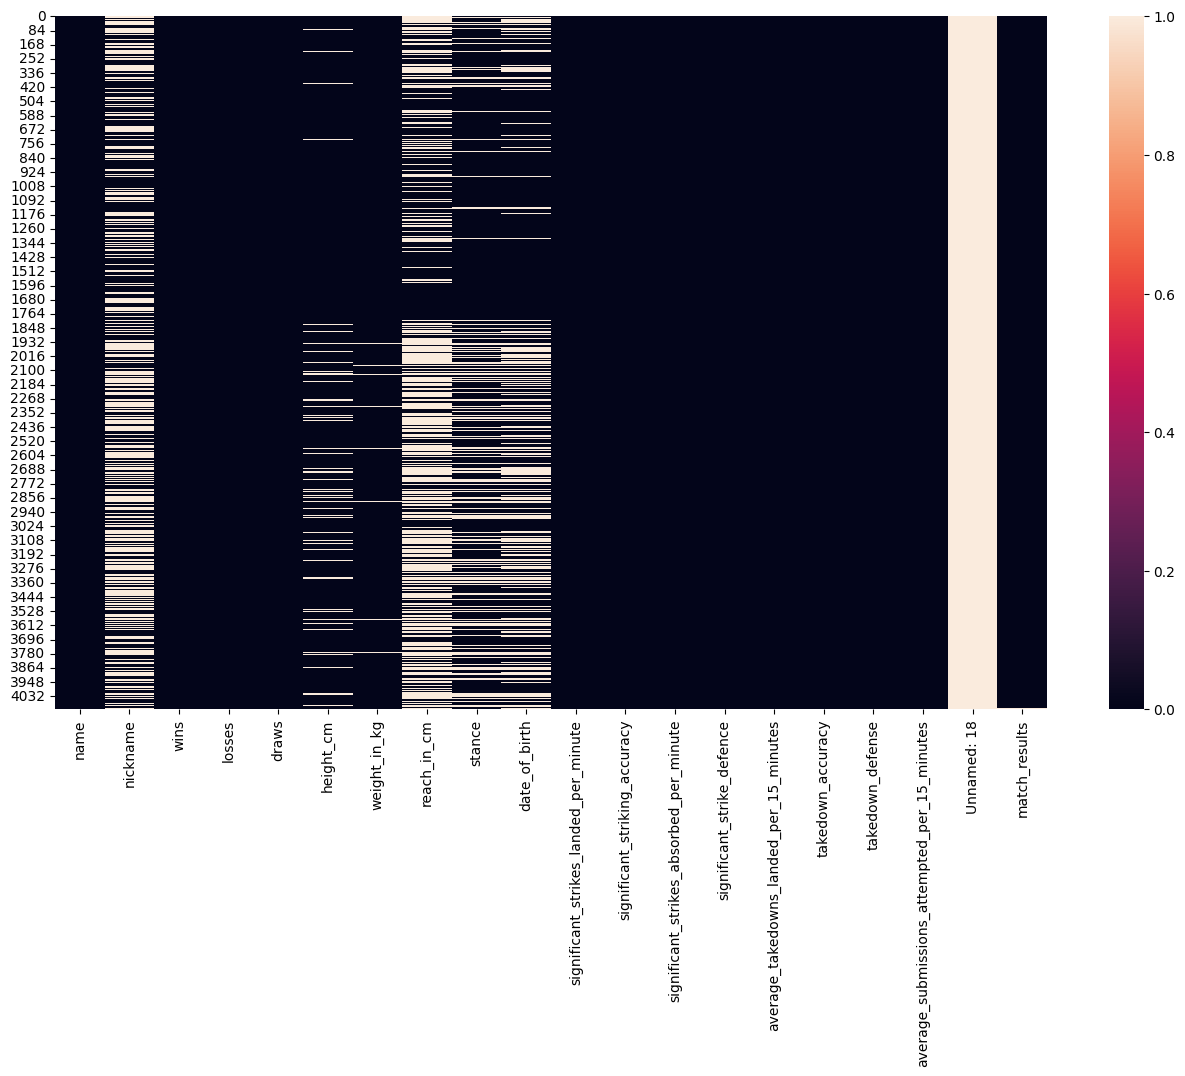

In [185]:
plt.figure(figsize=(16,9))
sns.heatmap(copy_data.isnull())
plt.savefig('Null Value Heat Map.jpg')

In [186]:
def drop_column(data,column_name):
    return data.drop(column_name, axis=1)
    

In [187]:
col_name="nickname"
copy_data=drop_column(copy_data,col_name)
copy_data

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Unnamed: 18,match_results
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox,10/5/1981,0.00,0,0.00,0,7.32,100,0,21.9,NaN,win
1,Daniel McWilliams,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77,0.00,0,0.00,0,100,21.6,NaN,loss
2,Dan Molina,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0,5.58,60,0.00,0,0,20.9,NaN,win
3,Paul Ruiz,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33,1.40,75,0.00,0,100,20.9,NaN,win
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,9/29/1994,2.05,60,2.73,42,10.23,100,0,20.4,NaN,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0,0.00,0,0.00,0,0,0.0,NaN,NaN
4107,Andre Pederneiras,1,1,2,172.72,70.31,NaN,Orthodox,3/22/1967,0.00,0,0.00,0,0.00,0,0,0.0,NaN,NaN
4108,Bryson Kamaka,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60,12.63,0,0.00,0,100,0.0,NaN,NaN
4109,Matej Penaz,6,1,0,190.50,83.91,210.82,Southpaw,10/14/1996,1.28,33,2.55,33,0.00,0,0,0.0,NaN,NaN


In [188]:
copy_data.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Unnamed: 18
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,0.0
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095,NaN
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924,NaN
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000,NaN
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000,NaN
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000,NaN


In [189]:
copy_data["height_cm"].isna().sum()

298

In [190]:
def boxplot(data,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(122)
    sns.distplot(data)

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\2329927754.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


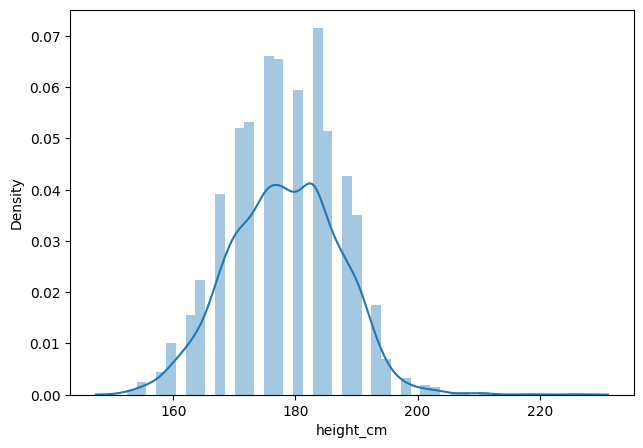

In [191]:
boxplot(copy_data["height_cm"])

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\2329927754.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


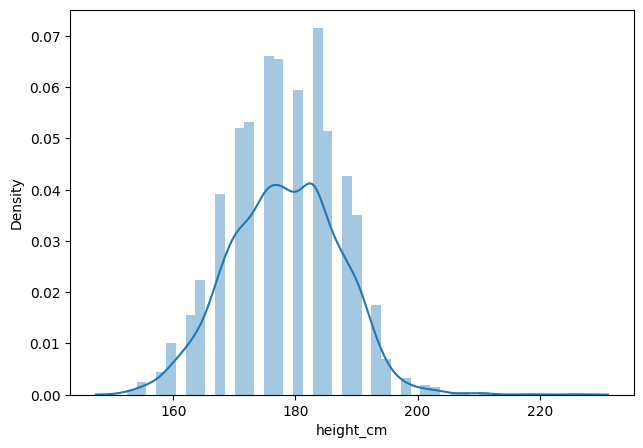

In [192]:
boxplot(copy_data["height_cm"])

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\2329927754.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


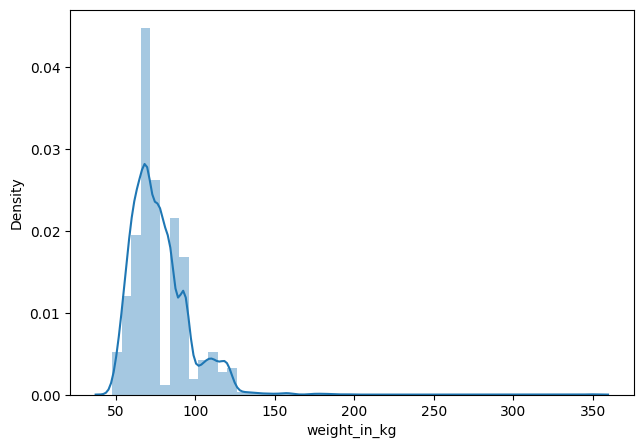

In [193]:
boxplot(copy_data["weight_in_kg"])

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\2329927754.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


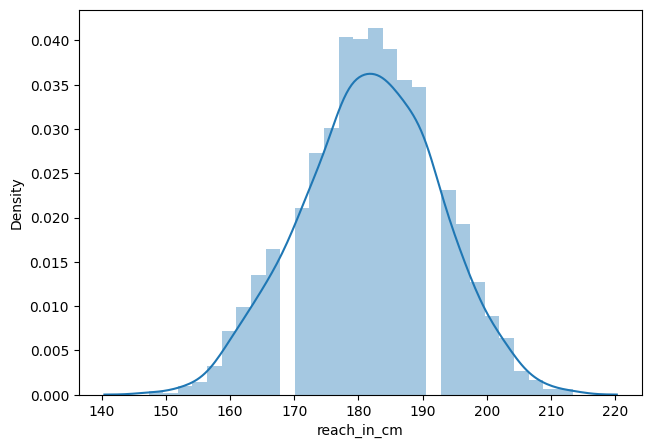

In [194]:
boxplot(copy_data["reach_in_cm"])

In [195]:
avg_height=copy_data["height_cm"].mean()

In [196]:
avg_weight=copy_data["weight_in_kg"].mean()
avg_weight

77.39582504970178

In [197]:
reach_50=copy_data["reach_in_cm"].median()
reach_50

182.88

In [198]:
copy_data["height_cm"].fillna(avg_height,inplace=True)
copy_data["height_cm"].isna().sum()

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\2096058622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_data["height_cm"].fillna(avg_height,inplace=True)


0

In [199]:
copy_data["weight_in_kg"].fillna(avg_weight,inplace=True)
copy_data["weight_in_kg"].isna().sum()

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\905310081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_data["weight_in_kg"].fillna(avg_weight,inplace=True)


0

In [200]:
copy_data["reach_in_cm"].fillna(reach_50,inplace=True)
copy_data["reach_in_cm"].isna().sum()

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\371933433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_data["reach_in_cm"].fillna(reach_50,inplace=True)


0

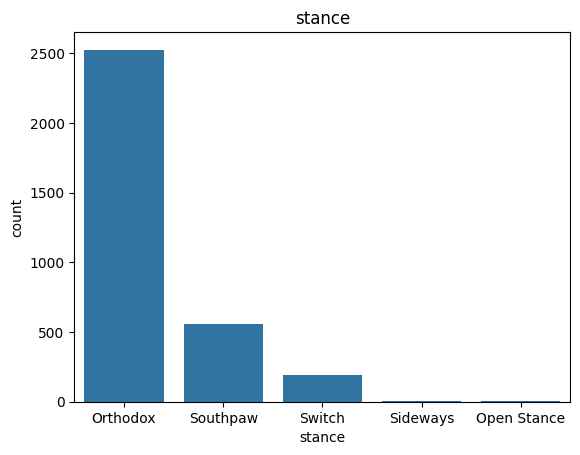

In [201]:
def count_plot(data,column_name):
    data[column_name].value_counts()
    sns.countplot(data=data, x=column_name)
    plt.title(column_name)
    plt.show()

column_name="stance"
count_plot(copy_data,column_name)

    

In [202]:
copy_data["stance"].value_counts()

stance
Orthodox       2526
Southpaw        560
Switch          192
Open Stance       7
Sideways          3
Name: count, dtype: int64

In [203]:
copy_data['stance'].fillna("Orthodox", inplace=True)

C:\Users\Zain\AppData\Local\Temp\ipykernel_2792\1565539949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_data['stance'].fillna("Orthodox", inplace=True)


In [204]:
col_name="date_of_birth"
copy_data=drop_column(copy_data,col_name)


In [205]:
copy_data.columns

Index(['name', 'wins', 'losses', 'draws', 'height_cm', 'weight_in_kg',
       'reach_in_cm', 'stance', 'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes',
       'Unnamed: 18', 'match_results'],
      dtype='object')

In [206]:
copy_data.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Unnamed: 18
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,0.0
mean,12.366821,5.726344,0.264413,178.234325,77.395825,182.310956,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095,NaN
std,9.374667,5.103768,0.822373,8.559768,17.790901,7.802461,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924,NaN
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,7.000000,2.000000,0.000000,172.720000,65.770000,180.340000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,11.000000,5.000000,0.000000,178.234325,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000,NaN
75%,17.000000,8.000000,0.000000,182.880000,83.910000,182.880000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000,NaN
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000,NaN


In [207]:
weight=list(copy_data["weight_in_kg"])

In [225]:
#outliers detection

#z-score

outliers=[]
def detect_outliers(data):
    threshold=3 ## 3rd standard deviation
    mean=np.mean(data)

    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)

    return outliers


    
detect_outliers(weight)


[140.61,
 158.76,
 156.49,
 142.88,
 174.63,
 136.08,
 158.76,
 151.95,
 146.51,
 156.49,
 195.04,
 181.44,
 136.08,
 176.9,
 133.81,
 158.76,
 136.08,
 131.54,
 181.44,
 140.61,
 136.08,
 131.54,
 131.54,
 145.15,
 174.63,
 185.97,
 149.69,
 156.49,
 133.81,
 349.27]

In [208]:
copy_data=copy_data.drop_duplicates(subset=["name"])
copy_data

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Unnamed: 18,match_results
0,Robert Drysdale,7,0,0,190.50,92.99,182.88,Orthodox,0.00,0,0.00,0,7.32,100,0,21.9,NaN,win
1,Daniel McWilliams,15,37,0,185.42,83.91,182.88,Orthodox,3.36,77,0.00,0,0.00,0,100,21.6,NaN,loss
2,Dan Molina,13,9,0,177.80,97.98,182.88,Orthodox,0.00,0,5.58,60,0.00,0,0,20.9,NaN,win
3,Paul Ruiz,7,4,0,167.64,61.23,182.88,Orthodox,1.40,33,1.40,75,0.00,0,100,20.9,NaN,win
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,2.05,60,2.73,42,10.23,100,0,20.4,NaN,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,0,175.26,106.59,182.88,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0,NaN,NaN
4107,Andre Pederneiras,1,1,2,172.72,70.31,182.88,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0,NaN,NaN
4108,Bryson Kamaka,12,20,1,180.34,77.11,182.88,Orthodox,9.47,60,12.63,0,0.00,0,100,0.0,NaN,NaN
4109,Matej Penaz,6,1,0,190.50,83.91,210.82,Southpaw,1.28,33,2.55,33,0.00,0,0,0.0,NaN,NaN


In [209]:
copy_data=copy_data.drop(columns="weight_in_kg")

In [210]:
copy_data=copy_data.drop(columns='name')

# Feature Engineering

In [211]:
copy_data.head(2)
match_prdection=copy_data["wins"]-copy_data["losses"]
match_prdection=list(match_prdection)
size=len(match_prdection)
for i in range(0,size):
    if match_prdection[i]<0:
        match_prdection[i]="loss"
    elif match_prdection[i]>0:
        match_prdection[i]="win"
    else:
        match_prdection[i]="draw"
label_name=["match_results"]
match_prdection=pd.DataFrame(match_prdection,columns=label_name)
match_prdection.to_csv("new_feature.csv",index=False)


In [212]:
copy_data.to_csv("cleaned_data.csv",index=False)

In [230]:
new_df=pd.read_csv("cleaned_data.csv")
columns=["wins","losses","draws"]
new_df=new_df.drop(columns=columns)
new_df

,height_cm,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,match_results
0,190.50,182.88,Orthodox,0.00,0,0.00,0,7.32,100,0,21.9,win
1,185.42,182.88,Orthodox,3.36,77,0.00,0,0.00,0,100,21.6,loss
2,177.80,182.88,Orthodox,0.00,0,5.58,60,0.00,0,0,20.9,win
3,167.64,182.88,Orthodox,1.40,33,1.40,75,0.00,0,100,20.9,win
4,190.50,193.04,Orthodox,2.05,60,2.73,42,10.23,100,0,20.4,win
...,...,...,...,...,...,...,...,...,...,...,...,...
4100,175.26,182.88,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0,NaN
4101,172.72,182.88,Orthodox,0.00,0,0.00,0,0.00,0,0,0.0,NaN
4102,180.34,182.88,Orthodox,9.47,60,12.63,0,0.00,0,100,0.0,NaN
4103,190.50,210.82,Southpaw,1.28,33,2.55,33,0.00,0,0,0.0,NaN


In [232]:
new_df.select_dtypes(include='number').corr()

,height_cm,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
height_cm,1.000000,0.685682,-0.029269,0.005175,-0.031604,-0.119236,-0.043982,-0.017405,-0.055757,0.033157
reach_in_cm,0.685682,1.000000,-0.031347,0.014056,-0.041267,-0.079437,-0.031936,-0.013875,-0.023761,0.015379
significant_strikes_landed_per_minute,-0.029269,-0.031347,1.000000,0.627623,0.445379,0.543099,0.116560,0.248719,0.479842,-0.015648
significant_striking_accuracy,0.005175,0.014056,0.627623,1.000000,0.306216,0.645120,0.304104,0.409730,0.487885,0.154297
significant_strikes_absorbed_per_minute,-0.031604,-0.041267,0.445379,0.306216,1.000000,0.272530,-0.028031,-0.000365,0.148459,-0.044376
significant_strike_defence,-0.119236,-0.079437,0.543099,0.645120,0.272530,1.000000,0.262520,0.431213,0.527054,0.132600
average_takedowns_landed_per_15_minutes,-0.043982,-0.031936,0.116560,0.304104,-0.028031,0.262520,1.000000,0.585248,0.159697,0.180446
takedown_accuracy,-0.017405,-0.013875,0.248719,0.409730,-0.000365,0.431213,0.585248,1.000000,0.345984,0.155581
takedown_defense,-0.055757,-0.023761,0.479842,0.487885,0.148459,0.527054,0.159697,0.345984,1.000000,0.024849
average_submissions_attempted_per_15_minutes,0.033157,0.015379,-0.015648,0.154297,-0.044376,0.132600,0.180446,0.155581,0.024849,1.000000


<Axes: >

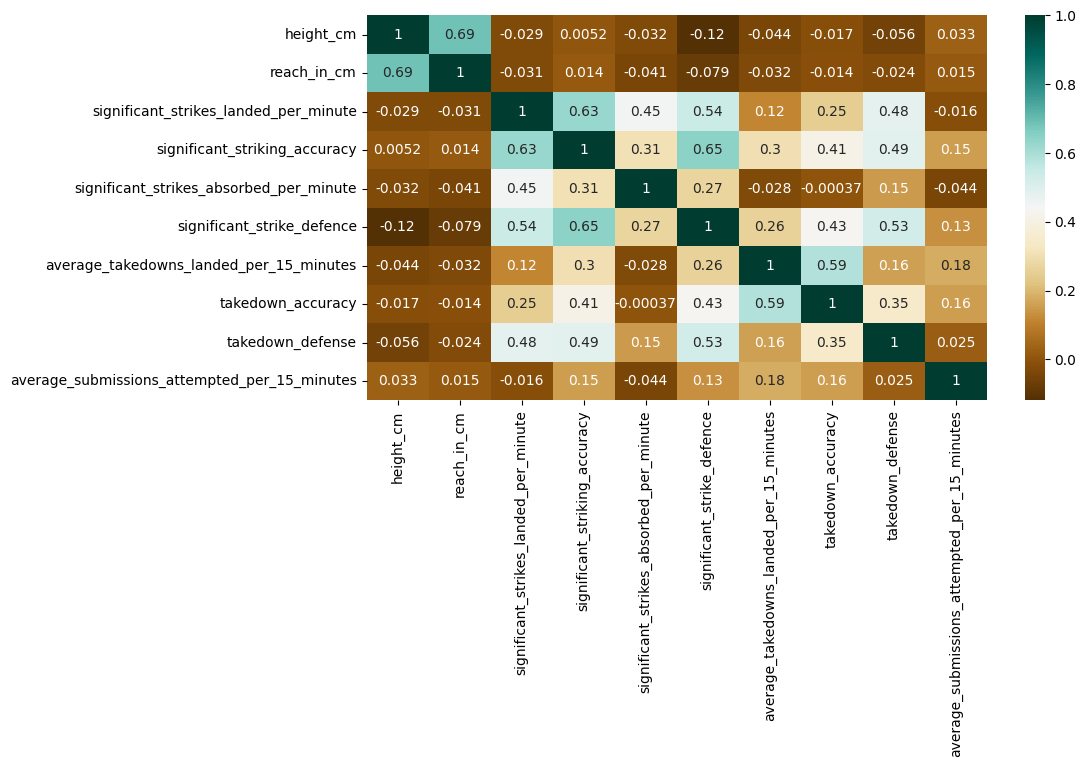

In [234]:
# Adjusting the Size of Figure
plt.figure(figsize=(10,5))
# calculating the Correlation
correlation = new_df.select_dtypes(include='number').corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation